# Key Insights and Findings
This Jupyter Notebook analyzes sales data, exploring relationships between sales, profit, discount, and quantity. 
It includes visualizations (correlation heatmaps, boxplots, scatter plots, and trends) to derive actionable insights 
for improving business strategies and profitability.

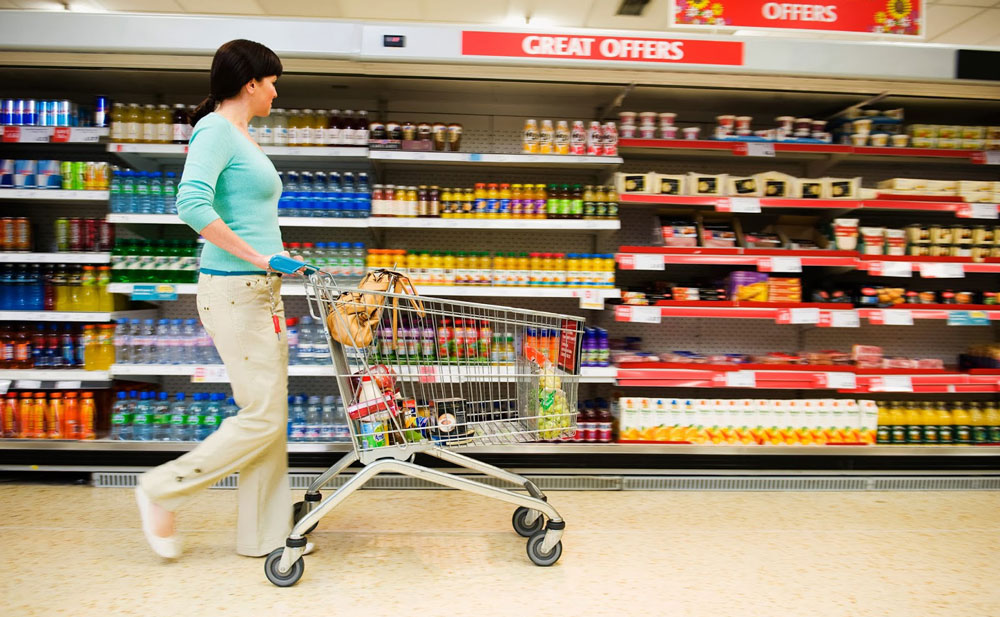

## Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting visualization aesthetics
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

df = pd.read_csv('superstore.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [3]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

## Drop unnecessary columns

In [4]:
df = df.drop(columns=['Row ID', 'Customer Name', 'Postal Code'])
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Feature enginnering

In [5]:
# Create new features in Python
df['Shipping Delay'] = pd.to_datetime(df['Ship Date']) - pd.to_datetime(df['Order Date'])
df['Discount Rate'] = df['Discount'] / df['Sales']
df['Profit Margin'] = df['Profit'] / df['Sales']
df['Order Year'] = pd.to_datetime(df['Order Date']).dt.year

# df = df['Discount Rate'].replace([np.inf, -np.inf], np.nan)
# df = df['Profit Margin'].replace([np.inf, -np.inf], np.nan)
# df = df.dropna(subset=['Discount Rate', 'Profit Margin'])
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Region,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Delay,Discount Rate,Profit Margin,Order Year
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3 days,0.000000,0.1600,2016
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3 days,0.000000,0.3000,2016
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Corporate,United States,Los Angeles,California,West,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4 days,0.000000,0.4700,2016
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7 days,0.000470,-0.4000,2015
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7 days,0.008941,0.1125,2015


# Exploratory Data Analysis (EDA)

## 1. Distribution Analysis
###  Summary statistics

In [6]:
df.describe()

,Sales,Quantity,Discount,Profit,Shipping Delay,Discount Rate,Profit Margin,Order Year
count,9994.000000,9994.000000,9994.000000,9994.000000,9994,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896,3 days 22:59:46.311787072,0.013608,0.120314,2015.722233
std,623.245101,2.225110,0.206452,234.260108,1 days 17:56:29.766161104,0.058107,0.466754,1.123555
min,0.444000,1.000000,0.000000,-6599.978000,0 days 00:00:00,0.000000,-2.750000,2014.000000
25%,17.280000,2.000000,0.000000,1.728750,3 days 00:00:00,0.000000,0.075000,2015.000000
50%,54.490000,3.000000,0.200000,8.666500,4 days 00:00:00,0.000199,0.270000,2016.000000
75%,209.940000,5.000000,0.200000,29.364000,5 days 00:00:00,0.004688,0.362500,2017.000000
max,22638.480000,14.000000,0.800000,8399.976000,7 days 00:00:00,1.801802,0.500000,2017.000000


### Histograms for Sales, Profit, and Quantity¶

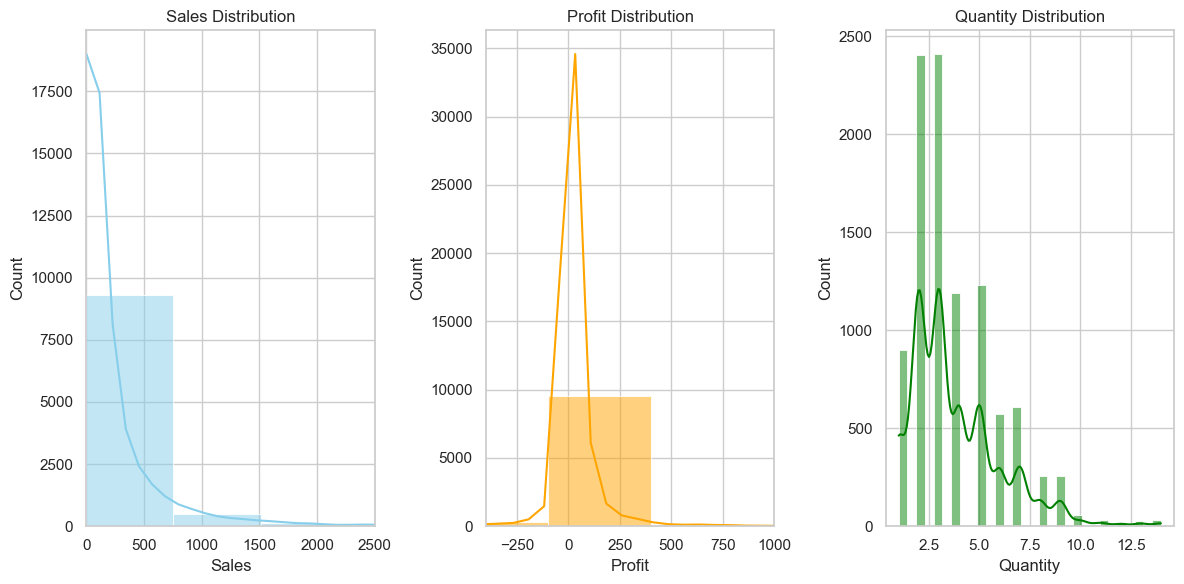

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for key variables like Sales, Profit, and Quantity
plt.figure(figsize=(12, 6))

# Sales Distribution
plt.subplot(1, 3, 1)
sns.histplot(df['Sales'], bins=30, kde=True, color='skyblue')
plt.title('Sales Distribution')
plt.xlim(0, 2500)
plt.savefig('foo.png',bbox_inches='tight')

# Profit Distribution
plt.subplot(1, 3, 2)
sns.histplot(df['Profit'], bins=30, kde=True, color='orange')
plt.title('Profit Distribution')
plt.xlim(-400, 1000)

# Quantity Distribution
plt.subplot(1, 3, 3)
sns.histplot(df['Quantity'], bins=30, kde=True, color='green')
plt.title('Quantity Distribution')

plt.tight_layout()
plt.show()

#### Insights 
##### 1. Sales Distribution (Left Chart):
- Sales are right-skewed, with most transactions being in the lower sales range. Outliers in high sales values are present.

##### 2. Profit Distribution (Middle Chart):
- Profits are heavily concentrated around smaller positive values. Some losses (negative profits) are visible.

##### 3. Quantity Distribution (Right Chart):
- Most orders consist of low quantities (1–3 items). Large orders are rare.

### Boxplots for Sales, Profit and Quantity

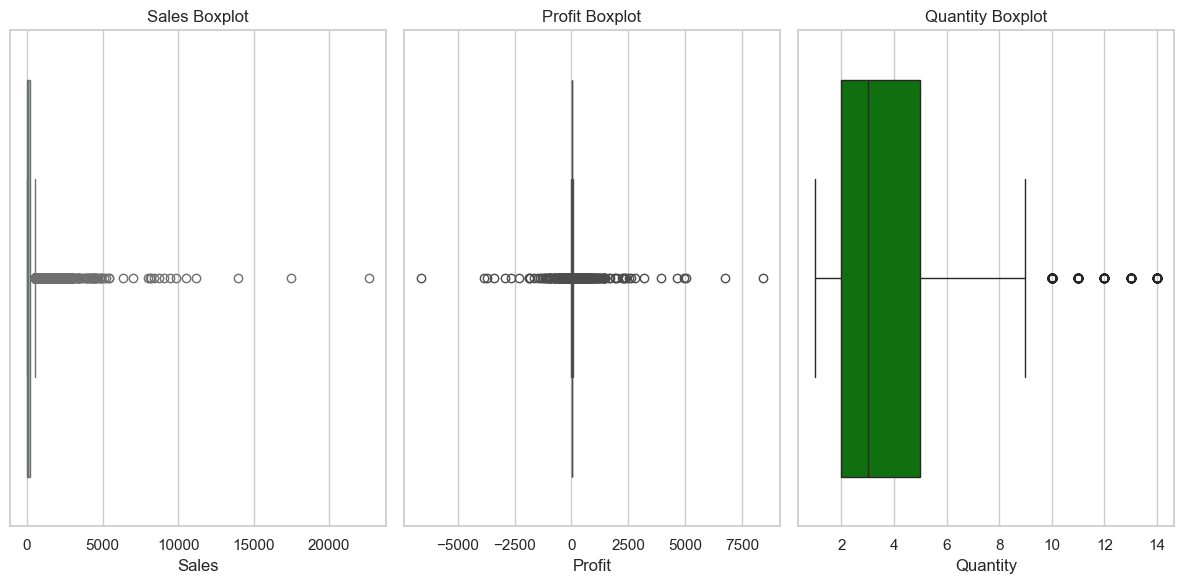

In [8]:
# Boxplot for Sales, Profit, and Quantity
plt.figure(figsize=(12, 6))

# Sales Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Sales'], color='skyblue')
plt.title('Sales Boxplot')

# Profit Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(x=df['Profit'], color='orange')
plt.title('Profit Boxplot')

# Quantity Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x=df['Quantity'], color='green')
plt.title('Quantity Boxplot')

plt.tight_layout()
plt.show()

#### Insights
##### Sales Boxplot: 
- Several high-value outliers indicate a few exceptionally high-sales transactions.
##### Profit Boxplot: 
- A mix of small profits and occasional losses. Negative profits (losses) are visible outliers.
##### Quantity Boxplot: 
- Most orders are small in quantity, with a few outliers in large orders.

---

## 2. Time Based Analysis

### Sales Trend Over Time

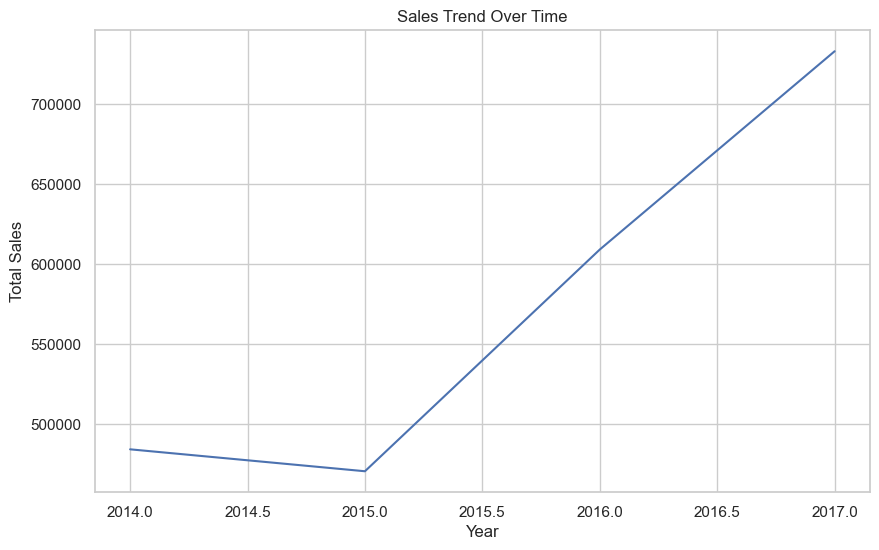

In [9]:
# Assuming your 'df' dataframe is already loaded and contains the 'Order Date' and 'Sales' columns
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year  # Extract year once

# Grouping by 'Year' for the overall sales trend
sales_trend = df.groupby('Year')['Sales'].sum()
sales_trend.plot(kind='line', figsize=(10, 6))
plt.title("Sales Trend Over Time")
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

C:\Users\Lakshay\AppData\Local\Temp\ipykernel_4748\202620558.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017['Month'] = df_2017['Order Date'].dt.month


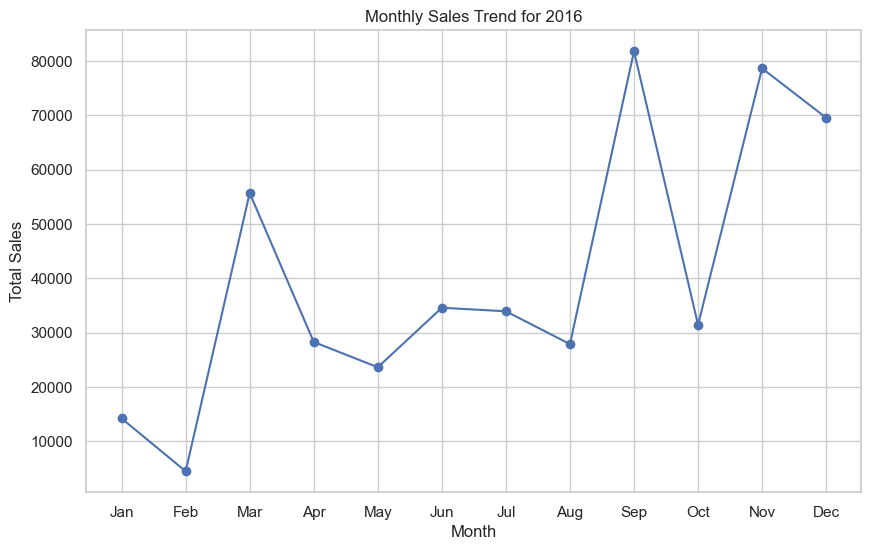

In [20]:
# Ensure 'Date' is in datetime format
df['order Date'] = pd.to_datetime(df['Order Date'])

# Filter the data for 2017
df_2017 = df[df['Year'] == 2014]

# Extract the month from the 'Date' column
df_2017['Month'] = df_2017['Order Date'].dt.month

# Group by 'Month' and sum the sales for each month
monthly_sales_2017 = df_2017.groupby('Month')['Sales'].sum()

# Plot the sales trend for each month in 2017
plt.figure(figsize=(10, 6))
monthly_sales_2017.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend for 2016")
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.savefig('foo.png',bbox_inches='tight')
plt.show()

#### Insights: Sales Trend Over Time
- Sales show seasonal spikes and trends.
- High sales are observed during specific months, possibly corresponding to holidays or promotional events.
A general upward trend suggests growth over time.

### Distribution of Shipping Delays

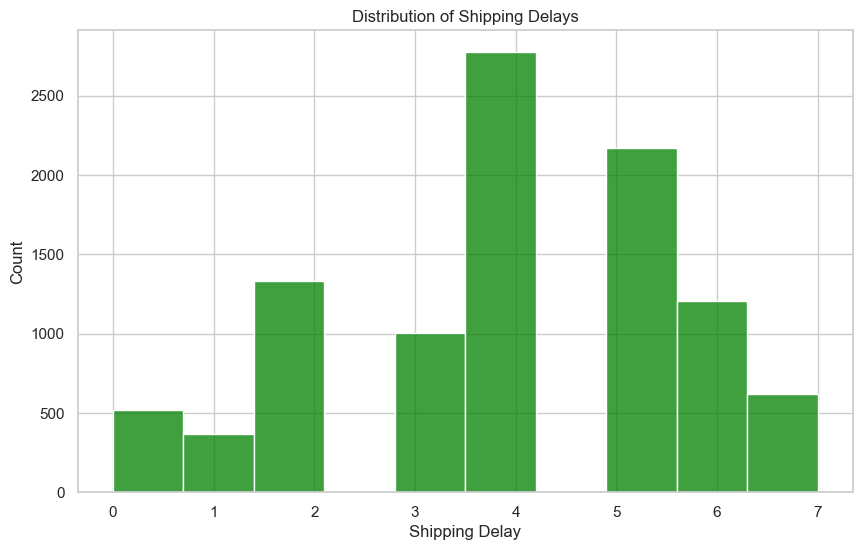

In [11]:
sns.histplot(df['Shipping Delay'].dt.days, bins=10, color='green')
plt.title("Distribution of Shipping Delays")
plt.savefig('foo.png')
plt.show()

#### Insights: Distribution of Shipping Delays
- Most orders are shipped within 1–5 days.
- A small percentage of orders face longer shipping delays (>7 days), which might impact customer satisfaction.

---

## 3. Relationship Analysis:

### Correlation matrix heatmap

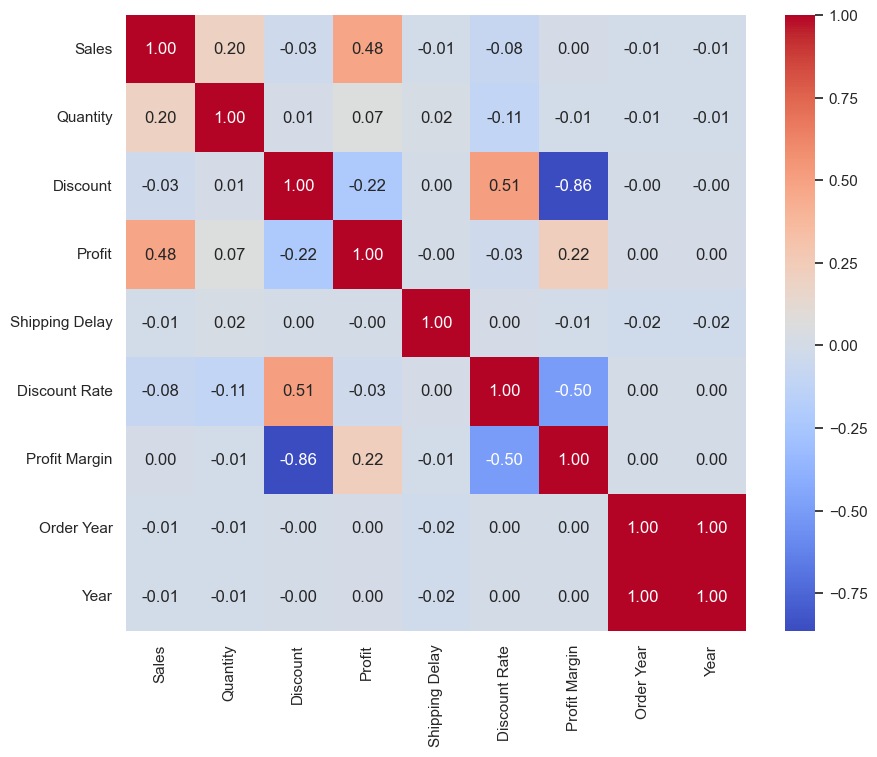

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.savefig("foo.png")
plt.show()

#### Insights from the Correlation Heatmap
1. **Sales and Profit**:
    - Moderate positive correlation (0.48): Higher sales generally lead to higher profits.
2. **Discount and Profit**:
    - Weak negative correlation (-0.22): Discounts tend to reduce profits.
3. **Discount Rate and Profit Margin**:
    - Strong negative correlation (-0.86): Higher discount rates significantly lower profit margins.

## Scatter Plot: Sales vs Profit

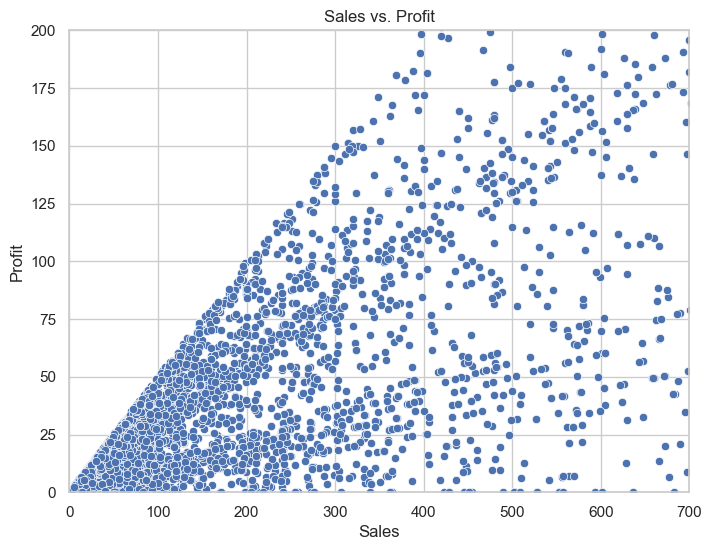

In [13]:
# Scatter plot for Sales vs. Profit
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs. Profit')
plt.xlim(0,700)
plt.ylim(0,200)
plt.savefig('foo.png')
plt.show()

#### Insights: Relationship Between Sales and Profit
- Higher sales generally result in higher profits, but some high-sales transactions have negative profits (losses).
- Indicates the need to evaluate pricing and discount strategies for unprofitable high-sales transactions.

### Pairplot (Sales, Profit, Quantity)

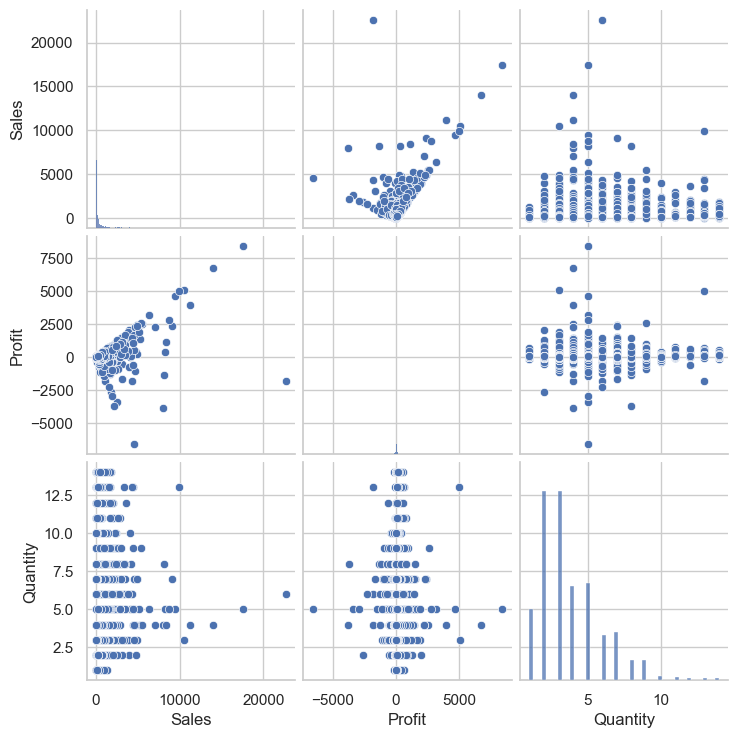

In [14]:
# Pairplot to explore relationships between multiple variables
sns.pairplot(df[['Sales', 'Profit', 'Quantity']])
plt.show()

#### Insights
- No clear linear relationship between Quantity and Profit, suggesting that higher quantities don’t always guarantee higher profits.
- Sales and Profit show a moderate positive relationship.

---

## 4. Categorical Analysis & Business Impact:

### Profit By Region and Segment

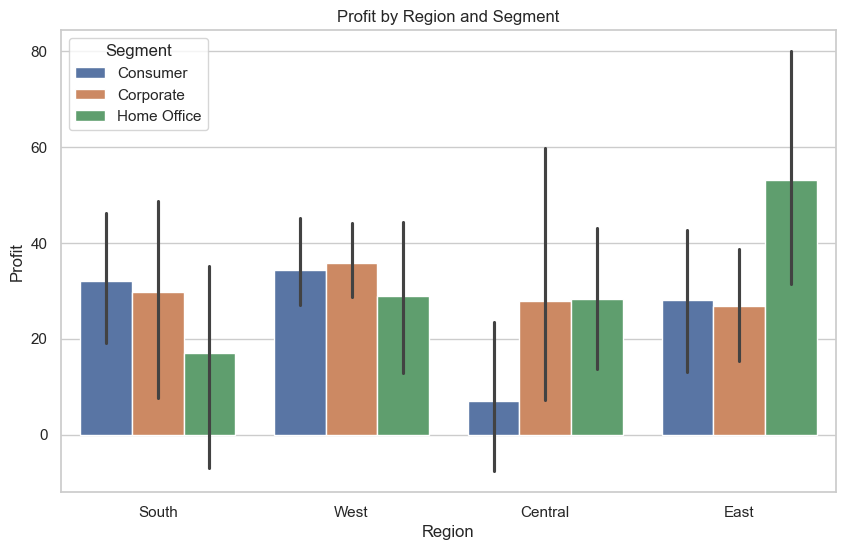

In [15]:
sns.barplot(x='Region', y='Profit', hue='Segment', data=df)
plt.title("Profit by Region and Segment")
plt.savefig('foo.png')
plt.show()

#### Insights: Profit By Region and Segment
- **Best-performing Region:** The West region generates the highest profits across all segments
- **Segment-wise Insights:**
    - Consumer and Corporate segments are profitable in all regions.
    - The Home Office segment struggles to generate significant profits in some regions.

### Violin Plot for Sales By Segment

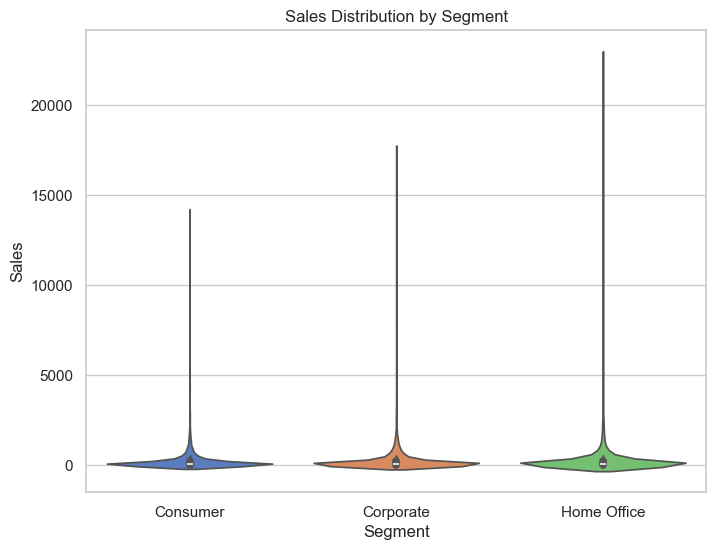

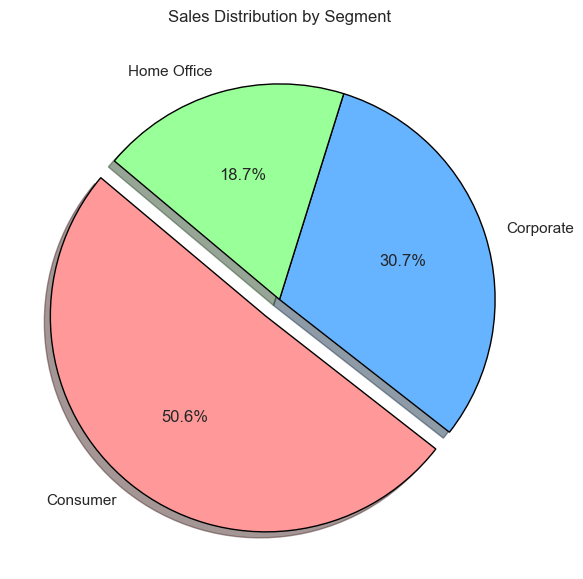

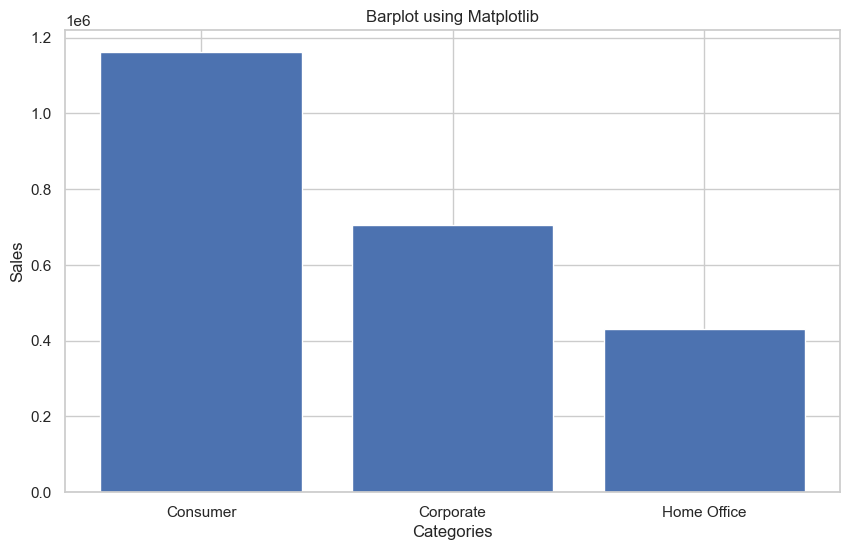

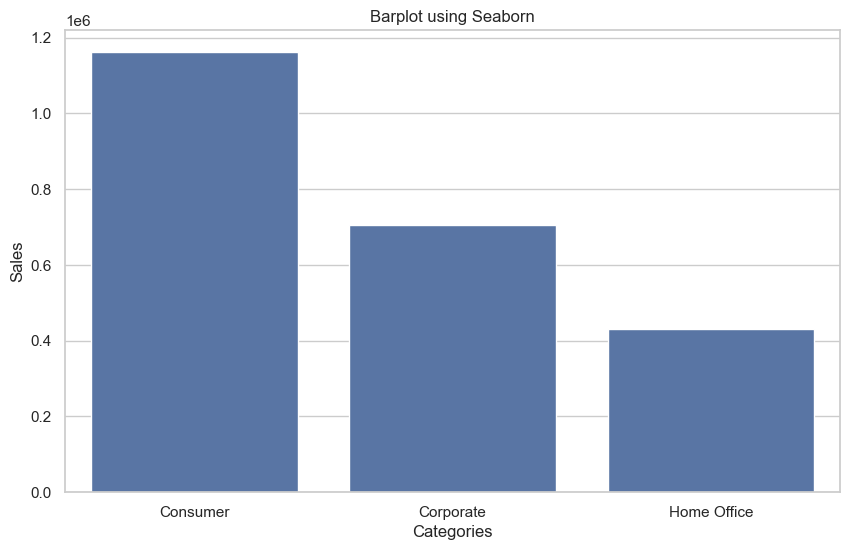

In [16]:
# Violin plot for Sales by Segment
plt.figure(figsize=(8, 6))
sns.violinplot(x='Segment', y='Sales',hue='Segment',data=df, palette='muted')
plt.title('Sales Distribution by Segment')
plt.show()


segments = df['Segment'].unique()

# Initialize an empty dictionary to store the sales by segment
sales = {}

# Loop through each segment and sum the sales for that segment
for segment in segments:
    sales[segment] = df[df['Segment'] == segment]['Sales'].sum()

# Convert the sales dictionary to a DataFrame for further plotting
sales_df = pd.DataFrame(list(sales.items()), columns=['Segment', 'Sales'])


colors = ['#ff9999', '#66b3ff', '#99ff99']

# Explode the largest slice (optional)
explode = (0.1, 0, 0)  # Exploding the first slice (Consumer)

# Create a pie chart with customizations
plt.figure(figsize=(7, 7))
plt.pie(sales_df['Sales'], labels=sales_df['Segment'], autopct='%1.1f%%', startangle=140, 
        colors=colors, explode=explode, shadow=True, wedgeprops={'edgecolor': 'black'})

# Add a title
plt.title('Sales Distribution by Segment')

# Show the plot
plt.savefig('foo.png')
plt.show()


plt.bar(sales_df['Segment'], sales_df['Sales'])

# Add titles and labels
plt.title("Barplot using Matplotlib")
plt.xlabel("Categories")
plt.ylabel("Sales")
# plt.savefig('foo.png')
# Show the plot
plt.show()


# # Seaborn Barplot
sns.barplot(x='Segment', y='Sales', data=sales_df)

# Add titles and labels
plt.title("Barplot using Seaborn")
plt.xlabel("Categories")
plt.ylabel("Sales")

# Show the plot
plt.show()

### Insights
#### Consumer: 
- Has the widest range of sales values, indicating diverse transaction sizes.
#### Corporate: 
- Moderate range of sales, with higher consistency compared to consumers.
#### Home Office: 
- Relatively smaller sales distribution compared to other segments.

### Boxplot: Profit by Ship Mode

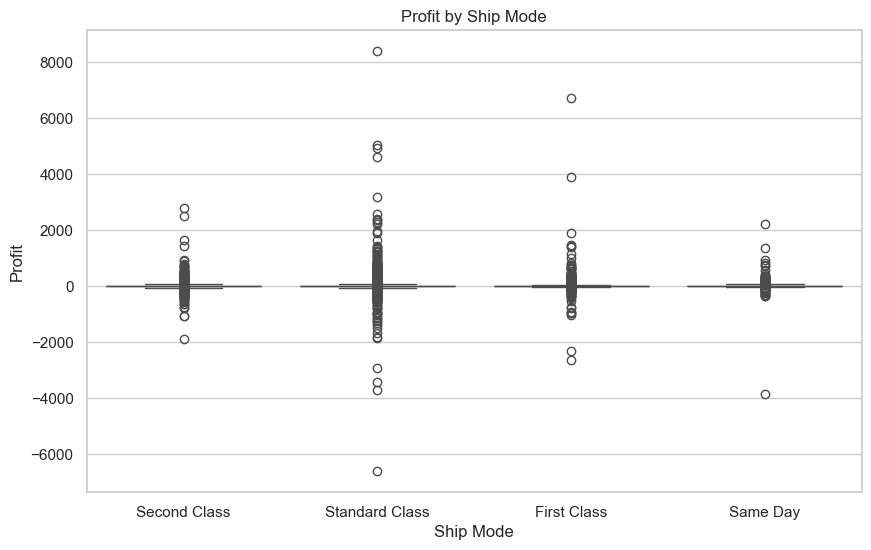

In [17]:
sns.boxplot(x='Ship Mode', y='Profit', data=df)
plt.title("Profit by Ship Mode")
plt.show()

#### Insights: Profit by Ship Mode
- **Standard Class:** Shows a consistent range of profits.
- **Same Day Ship Mode:** Profits are relatively low, likely due to higher shipping costs.
- **First Class:** A mix of profits and occasional losses.
- **Second Class:** Stable profits but fewer extremes.

### Top 10 Products by Sales
- A small subset of products contributes to the majority of sales.
- These products are likely high-revenue drivers, and their inventory and pricing strategies should be prioritized.

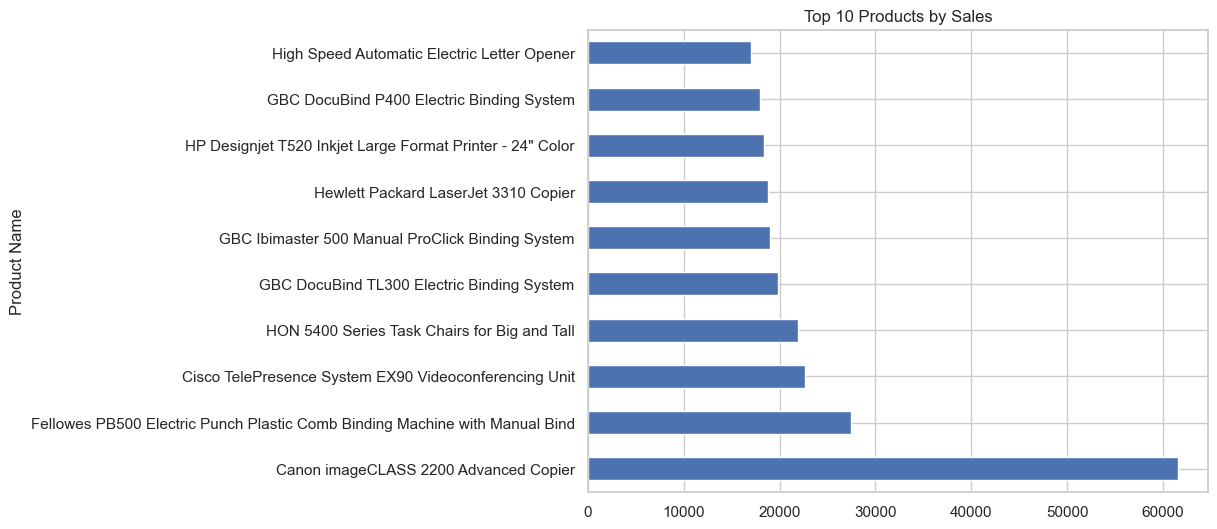

In [18]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', figsize=(8, 6))
plt.title("Top 10 Products by Sales")
plt.savefig('foo.png',bbox_inches='tight')
plt.show()

#### Insights: Top 10 Products By Sales
- A small subset of products contributes to the majority of sales.
- These products are likely high-revenue drivers, and their inventory and pricing strategies should be prioritized.

In [19]:
# df.to_excel('superstore1.xlsx',index=False)